# PROJECT DESCRIPTION

**Autism Spectrum Disorder (ASD) Risk Prediction Using Machine Learning and Deep Learning**

Developed a machine learning-based web application to predict the risk of Autism Spectrum Disorder (ASD) in children, adolescents, and adults using responses from the AQ-10 screening questionnaire.

The project utilized AQ-10 behavioral assessment questions along with additional demographic and medical features such as sex, family history of ASD, and history of neonatal jaundice.

The workflow included comprehensive data cleaning, exploratory data analysis (EDA), feature preprocessing, model training, and performance evaluation. Multiple models were tested and optimized to achieve reliable classification performance.

The final model was deployed as an interactive web application using Streamlit, allowing users to input screening responses and receive real-time ASD risk predictions.

You can see the AQ-10 questioniares for yourself using this link:

CHILDREN: https://docs.autismresearchcentre.com/tests/AQ10-Child.pdf

ADOLESCENTS: https://docs.autismresearchcentre.com/tests/AQ10-Adolescent.

ADULTS: https://www.autismresearchcentre.com/content/uploads/2024/11/AQ10.pdf


# DATA CLEANING

In [19]:
import pandas as pd

In [20]:
data = pd.read_csv('/content/Autism_Screening_Data_Combined.csv')

In [21]:
print(data.head())

   A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age Sex Jauundice Family_ASD Class
0   1   1   0   1   0   0   1   1   0    0   15   m        no         no    NO
1   0   1   1   1   0   1   1   0   1    0   15   m        no         no    NO
2   1   1   1   0   1   1   1   1   1    1   15   f        no        yes   YES
3   1   1   1   1   1   1   1   1   0    0   16   f        no         no   YES
4   1   1   1   1   1   1   1   1   1    1   15   f        no         no   YES


In [22]:
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6075 entries, 0 to 6074
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   A1          6075 non-null   int64 
 1   A2          6075 non-null   int64 
 2   A3          6075 non-null   int64 
 3   A4          6075 non-null   int64 
 4   A5          6075 non-null   int64 
 5   A6          6075 non-null   int64 
 6   A7          6075 non-null   int64 
 7   A8          6075 non-null   int64 
 8   A9          6075 non-null   int64 
 9   A10         6075 non-null   int64 
 10  Age         6075 non-null   int64 
 11  Sex         6075 non-null   object
 12  Jauundice   6075 non-null   object
 13  Family_ASD  6075 non-null   object
 14  Class       6075 non-null   object
dtypes: int64(11), object(4)
memory usage: 712.0+ KB


In [23]:
print("Descriptive Statistics:")
data.describe(include='all')

Descriptive Statistics:


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Jauundice,Family_ASD,Class
count,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075,6075,6075,6075
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,m,no,no,NO
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3508,5030,4953,4271
mean,0.693169,0.485103,0.537449,0.547490,0.543868,0.443128,0.497942,0.538436,0.429794,0.599835,19.838025,NaN,NaN,NaN,NaN
std,0.461217,0.499819,0.498637,0.497781,0.498113,0.496796,0.500037,0.498562,0.495087,0.489972,14.934246,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,NaN,NaN,NaN,NaN
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,19.000000,NaN,NaN,NaN,NaN
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,NaN,NaN,NaN,NaN


This dataset is clean and has no missing values.

I want to drop the samples of all children from 1 - 3 years old (toddlers) because of the high imbalance in the samples. (All the samples have no autism)

In [24]:
data = data[~((data['Age'] >= 1) & (data['Age'] <= 3))]
print(f"New data shape after dropping 1-3 year olds: {data.shape}")

New data shape after dropping 1-3 year olds: (5021, 15)


# EXPLORATORY DATA ANALYSIS

MAJOR EDA QUESTIONS:
1. What factors most reliably indicate autism

2. Are factors like jaundice, sex and family history of ASD strong indicators of Autism Spectrum Disorder (ASD)?

3. What are other notable patterns in this data

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

## DISTRIBUTION ANALYSIS

In [26]:
# Age is the only feature that is numerical and i decided to categorize this column so that i can see the distribution both in categorical and numerical format
bins = [4, 12, 19, data['Age'].max() + 1]
labels = ['Child', 'Adolescent', 'Adult']
data['Age_Binned'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

In [27]:
categorical = data.drop('Age', axis = 1)
numerical = data['Age']

### DISTRIBUTION ANALYSIS FOR AGE

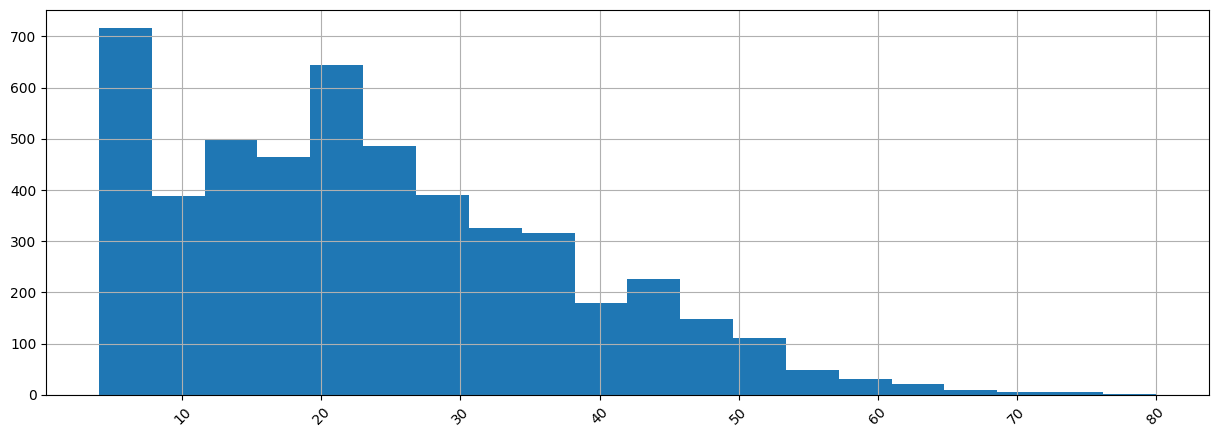

In [28]:
numerical.hist(figsize=(15, 5), bins = 20)
plt.xticks(rotation = 45)
plt.show()

OBSERVATIONS:
1. From the distribution analysis of age you can see that the highest ages are within the range of 4-8, while the lowest are withing the range of 70 -80

2. This shows that the data contains outliers in the age column

### DISTRIBUTION ANALYSIS FOR AGE, JAUNDICE, FAMILY ASD, CLASS AND SEX COLUMNS

In [29]:
disdata = categorical[["Age_Binned", "Jauundice", "Family_ASD", "Class", "Sex"]]

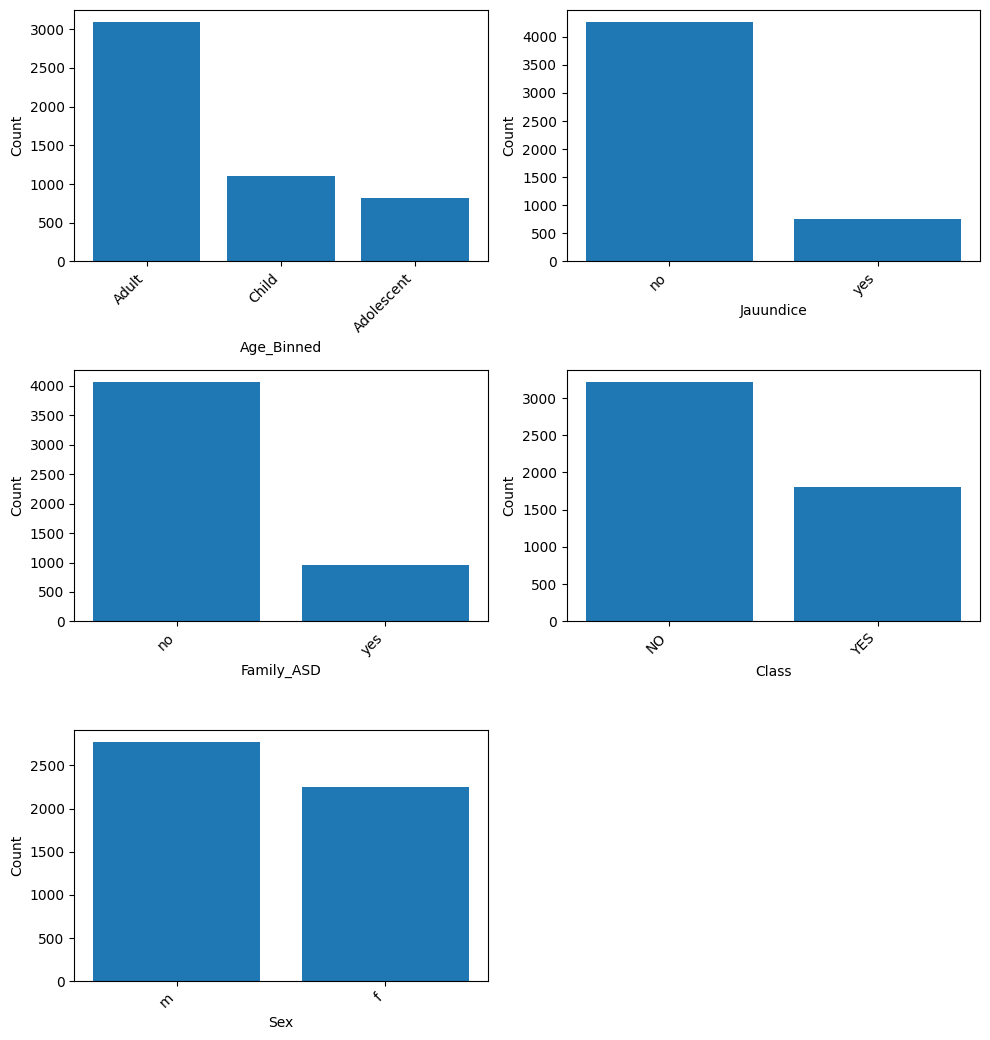

In [30]:
#Creating a way to access the subplots
# disdata has 5 columns: 'Age_Binned', 'Jauundice', 'Family_ASD', 'Class', 'Sex'
num_columns_to_plot = len(disdata.columns)
num_rows = (num_columns_to_plot + 1) // 2 # Calculate number of rows needed (e.g., 5 -> 3 rows)
num_cols = 2 # Always 2 columns per row

#Create the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize = (10, num_rows * 3.5)) # Adjust figsize dynamically


#loop throught the columns of the dataset
for idx, columnname in enumerate(disdata.columns):
    row_idx = idx // num_cols
    col_idx = idx % num_cols

    #for each column do a value counts
    vc = disdata[columnname].value_counts()

    #Get the counts and the the values in a seperate list
    x = vc.index.tolist()
    y = vc.values.tolist()

    #Plot a bar chart
    axs[row_idx, col_idx].bar(x, y)
    axs[row_idx, col_idx].set_xlabel(columnname)
    axs[row_idx, col_idx].set_ylabel('Count')
    axs[row_idx, col_idx].set_xticks(range(len(x))) # Set fixed ticks
    axs[row_idx, col_idx].set_xticklabels(x, rotation = 45, ha = 'right')

# Remove any empty subplots if the number of columns is odd
if num_columns_to_plot % 2 != 0:
    fig.delaxes(axs[num_rows - 1, num_cols - 1]) # Delete the last subplot if it's empty

plt.tight_layout()
plt.show()

OBSERVATION:
1. There are way more adult data than child and adolescent data. But the amount for each is good enough

2. Most of the samples do not have jaundice

3. Most of the samples do not have a family history of ASD

4. From the class distribution in the column class you can see that there is an imbalance in the dataset. There are much more people at lower risk of autism than people with high risk. I will look into whether this imbalance should be fixed later on or not. Further analysis would also be done to consider which age group contributed most to this imbalance or if all the age groups are imbalanced.

5. The gender of samples is balanced with slightly more male than female


For each of the age groups the A10 questions differ, therefore i would like to perform analysis sperately for each group to see the patterns in each.

### DISTRIBUTION ANALYSIS FOR CHILD SAMPLES

In [31]:
disdatachild = disdata[disdata["Age_Binned"]=="Child"]
disdatachild = disdatachild.drop("Age_Binned", axis=1)

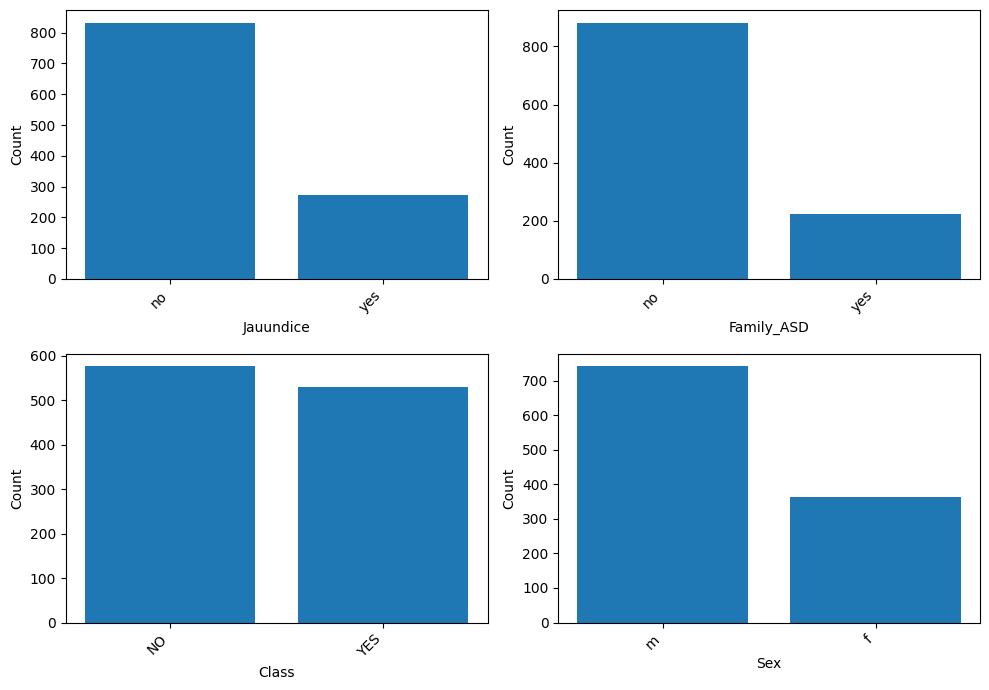

In [32]:
num_columns_to_plot = len(disdatachild.columns)
num_rows = (num_columns_to_plot + 1) // 2
num_cols = 2

#Create the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize = (10, num_rows * 3.5))


#loop throught the columns of the dataset
for idx, columnname in enumerate(disdatachild.columns):
    row_idx = idx // num_cols
    col_idx = idx % num_cols

    #for each column do a value counts
    vc = disdatachild[columnname].value_counts()

    #Get the counts and the the values in a seperate list
    x = vc.index.tolist()
    y = vc.values.tolist()

    #Plot a bar chart
    axs[row_idx, col_idx].bar(x, y)
    axs[row_idx, col_idx].set_xlabel(columnname)
    axs[row_idx, col_idx].set_ylabel('Count')
    axs[row_idx, col_idx].set_xticks(range(len(x))) # Set fixed ticks
    axs[row_idx, col_idx].set_xticklabels(x, rotation = 45, ha = 'right')

# Remove any empty subplots if the number of columns is odd
if num_columns_to_plot % 2 != 0:
    fig.delaxes(axs[num_rows - 1, num_cols - 1])
plt.tight_layout()
plt.show()

OBSERVATION

1. The jaundice, Family_ASD columns retain the original shape of the previous analysis on the whole dataset

2. There is no imbalance in the data for chldren

3. There is an imbalanced in gender for children. There are more male than female samples

### DISTRIBUTION ANALYSIS FOR ADOLESCENT SAMPLES

In [33]:
disdataadol = disdata[disdata["Age_Binned"]=="Adolescent"]
disdataadol= disdataadol.drop("Age_Binned", axis=1)

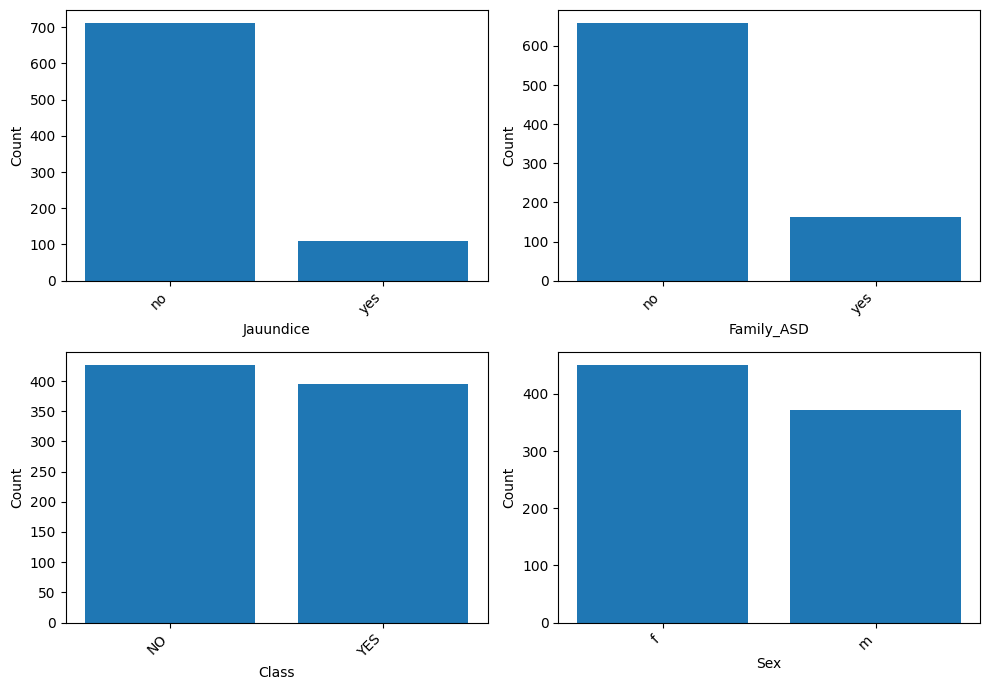

In [34]:
num_columns_to_plot = len(disdataadol.columns)
num_rows = (num_columns_to_plot + 1) // 2
num_cols = 2

#Create the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize = (10, num_rows * 3.5))


#loop throught the columns of the dataset
for idx, columnname in enumerate(disdataadol.columns):
    row_idx = idx // num_cols
    col_idx = idx % num_cols

    #for each column do a value counts
    vc = disdataadol[columnname].value_counts()

    #Get the counts and the the values in a seperate list
    x = vc.index.tolist()
    y = vc.values.tolist()

    #Plot a bar chart
    axs[row_idx, col_idx].bar(x, y)
    axs[row_idx, col_idx].set_xlabel(columnname)
    axs[row_idx, col_idx].set_ylabel('Count')
    axs[row_idx, col_idx].set_xticks(range(len(x))) # Set fixed ticks
    axs[row_idx, col_idx].set_xticklabels(x, rotation = 45, ha = 'right')

# Remove any empty subplots if the number of columns is odd
if num_columns_to_plot % 2 != 0:
    fig.delaxes(axs[num_rows - 1, num_cols - 1])
plt.tight_layout()
plt.show()

OBSERVATION:
1. The jaundice and Family_ASD column continue to retain the same shape
2. There is no class imbalance for the adolescent samples
3. The gender of samples here are balanced enough. But there are slightly more female than male samples

### DISTRIBUTION ANALYSIS FOR ADULT SAMPLES

In [35]:
disdataadult = disdata[disdata["Age_Binned"]=="Adult"]
disdataadult = disdataadult.drop("Age_Binned", axis=1)

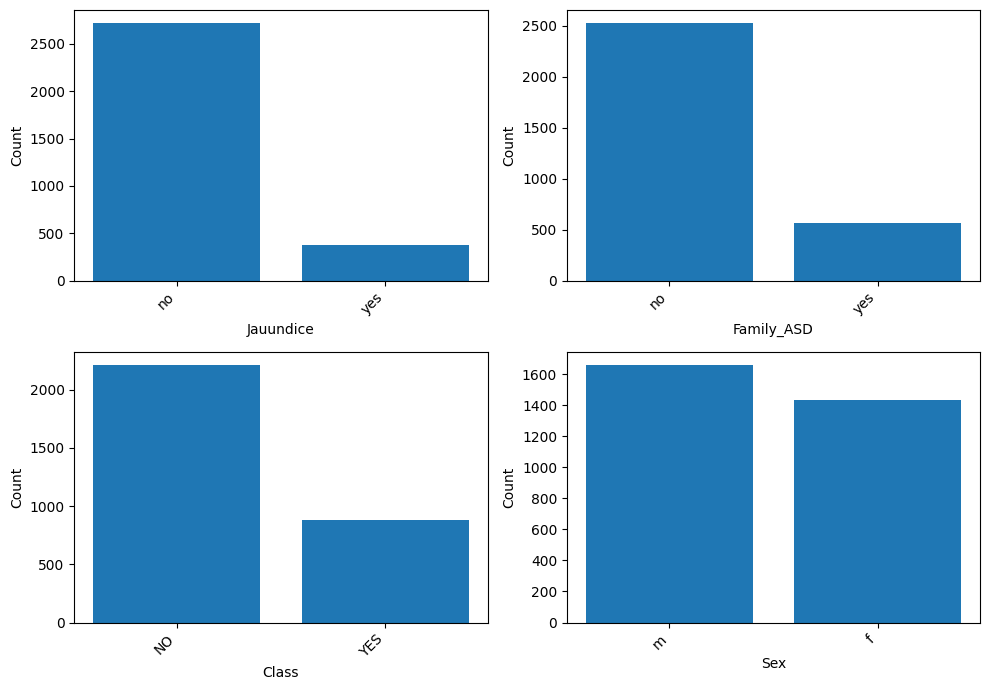

In [36]:
num_columns_to_plot = len(disdataadult.columns)
num_rows = (num_columns_to_plot + 1) // 2
num_cols = 2

#Create the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize = (10, num_rows * 3.5))


#loop throught the columns of the dataset
for idx, columnname in enumerate(disdataadult.columns):
    row_idx = idx // num_cols
    col_idx = idx % num_cols

    #for each column do a value counts
    vc = disdataadult[columnname].value_counts()

    #Get the counts and the the values in a seperate list
    x = vc.index.tolist()
    y = vc.values.tolist()

    #Plot a bar chart
    axs[row_idx, col_idx].bar(x, y)
    axs[row_idx, col_idx].set_xlabel(columnname)
    axs[row_idx, col_idx].set_ylabel('Count')
    axs[row_idx, col_idx].set_xticks(range(len(x))) # Set fixed ticks
    axs[row_idx, col_idx].set_xticklabels(x, rotation = 45, ha = 'right')

# Remove any empty subplots if the number of columns is odd
if num_columns_to_plot % 2 != 0:
    fig.delaxes(axs[num_rows - 1, num_cols - 1])
plt.tight_layout()
plt.show()

OBSERVATION:
1. The Jaundice and family_ASD still retained the same distribution
2. There is an obvious imbalance in the class for adult samples. This shows that the previous imbalance we saw while analyzing the whole dataset was caused by the adult samples.
3. The gender of the samples are fairly balanced.

## RELATIONSHIP ANALYSIS

### RELATIONSHIP ANALYSIS FOR CHILD SAMPLES

In [37]:
rel_child = categorical[categorical['Age_Binned'] == 'Child']

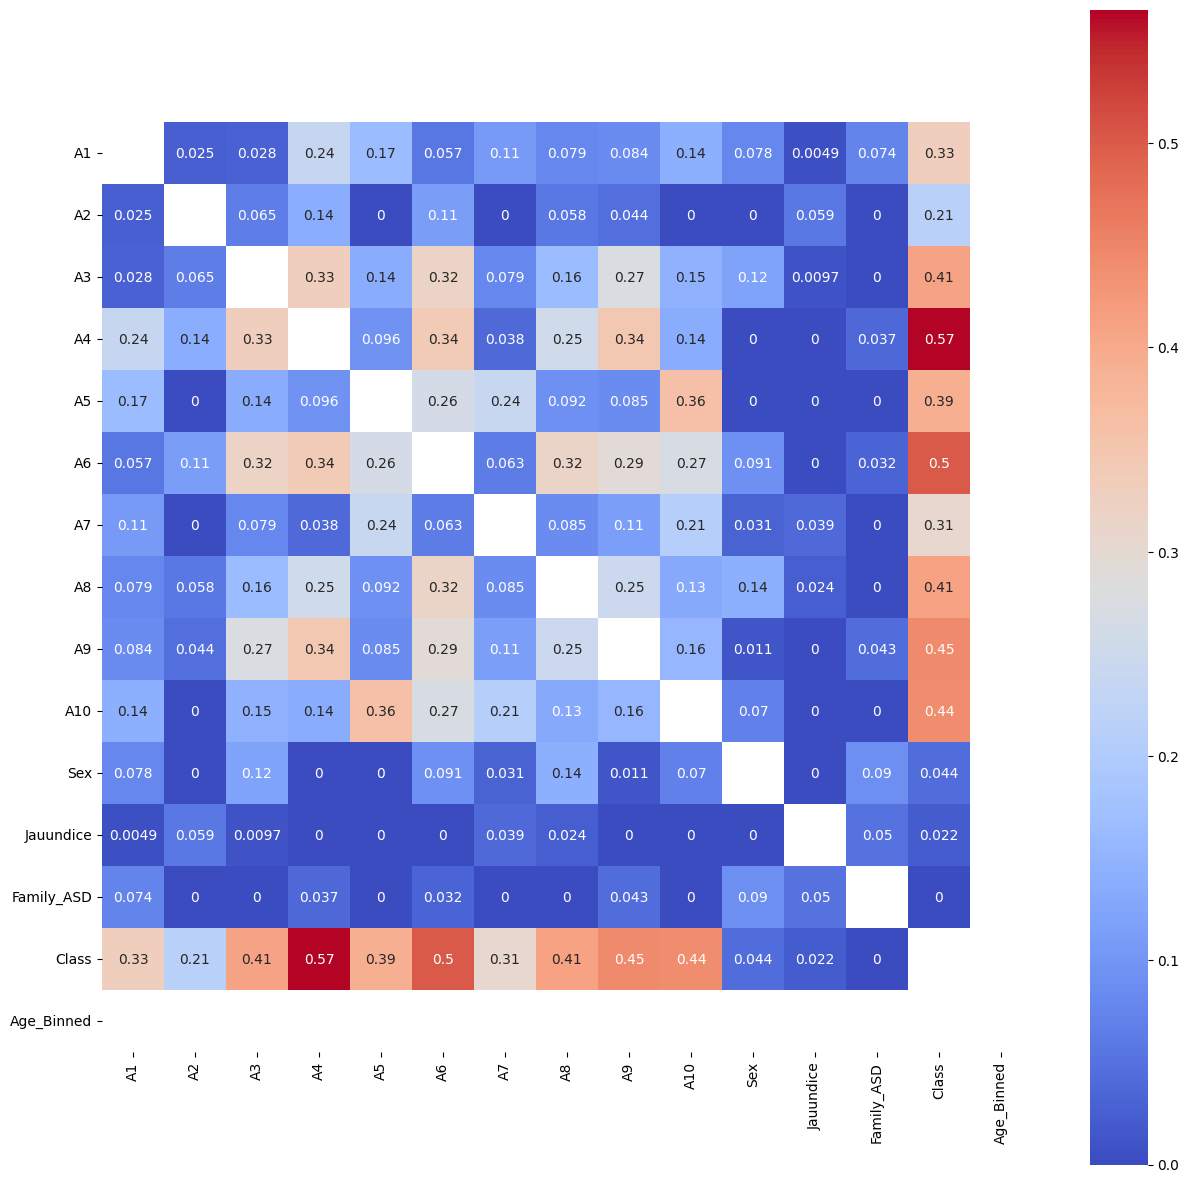

In [38]:
from scipy.stats import chi2_contingency
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
corr_matrix = pd.get_dummies(rel_child).corr()
cramers_v_matrix = pd.DataFrame(index = rel_child.columns, columns = rel_child.columns)
for col1 in rel_child.columns:
    for col2 in rel_child.columns:
        if col1 != col2:
            contingency_table = pd.crosstab(rel_child[col1], rel_child[col2])
            chi2 = chi2_contingency(contingency_table)[0]
            n = contingency_table.sum().sum()
            r,k = contingency_table.shape
            phi2 = chi2/n
            phi2corr = max(0, phi2-(k-1)*(r-1)/(n-1))
            rcorr = r - ((r-1)**2)/(n-1)
            kcorr = k - ((k-1)**2)/(n-1)
            cramers_v = np.sqrt(phi2corr/ min((kcorr-1), (rcorr-1)))

            cramers_v_matrix.loc[col1, col2] = cramers_v
cramers_v_matrix = cramers_v_matrix.apply(pd.to_numeric, errors ='coerce')
plt.figure(figsize=(15, 15))
sns.heatmap(cramers_v_matrix, annot = True, cmap='coolwarm', square = True)
plt.show()

OBSERVATION:

If you look at the heatmap, you can see there are various features that have a high correlationship with each other
1. You can see that the correlation between class and features like sex, jauundice, family_asd is very low. While its relationship with the AQ 1-10 questions are relatively high.
2. Class has an especially high correlation with A4 (This question asks if the child finds it easy to go back and forth between different activities?).
3. Another notable correlation of features with our target variable class is A6 (this question asks whether or not the child is good at social chit-chat)
4. It is also notable that A2 (which asks whether the child concentrates more on the whole picture rather than small details) has a low correlation with class.
5. Through out the heatmap you can see other notable correlations between features

### RELATIONSHIP ANALYSIS FOR ADOLESCENT SAMPLES

In [39]:
rel_adol = categorical[categorical['Age_Binned'] == 'Adolescent']

<Axes: >

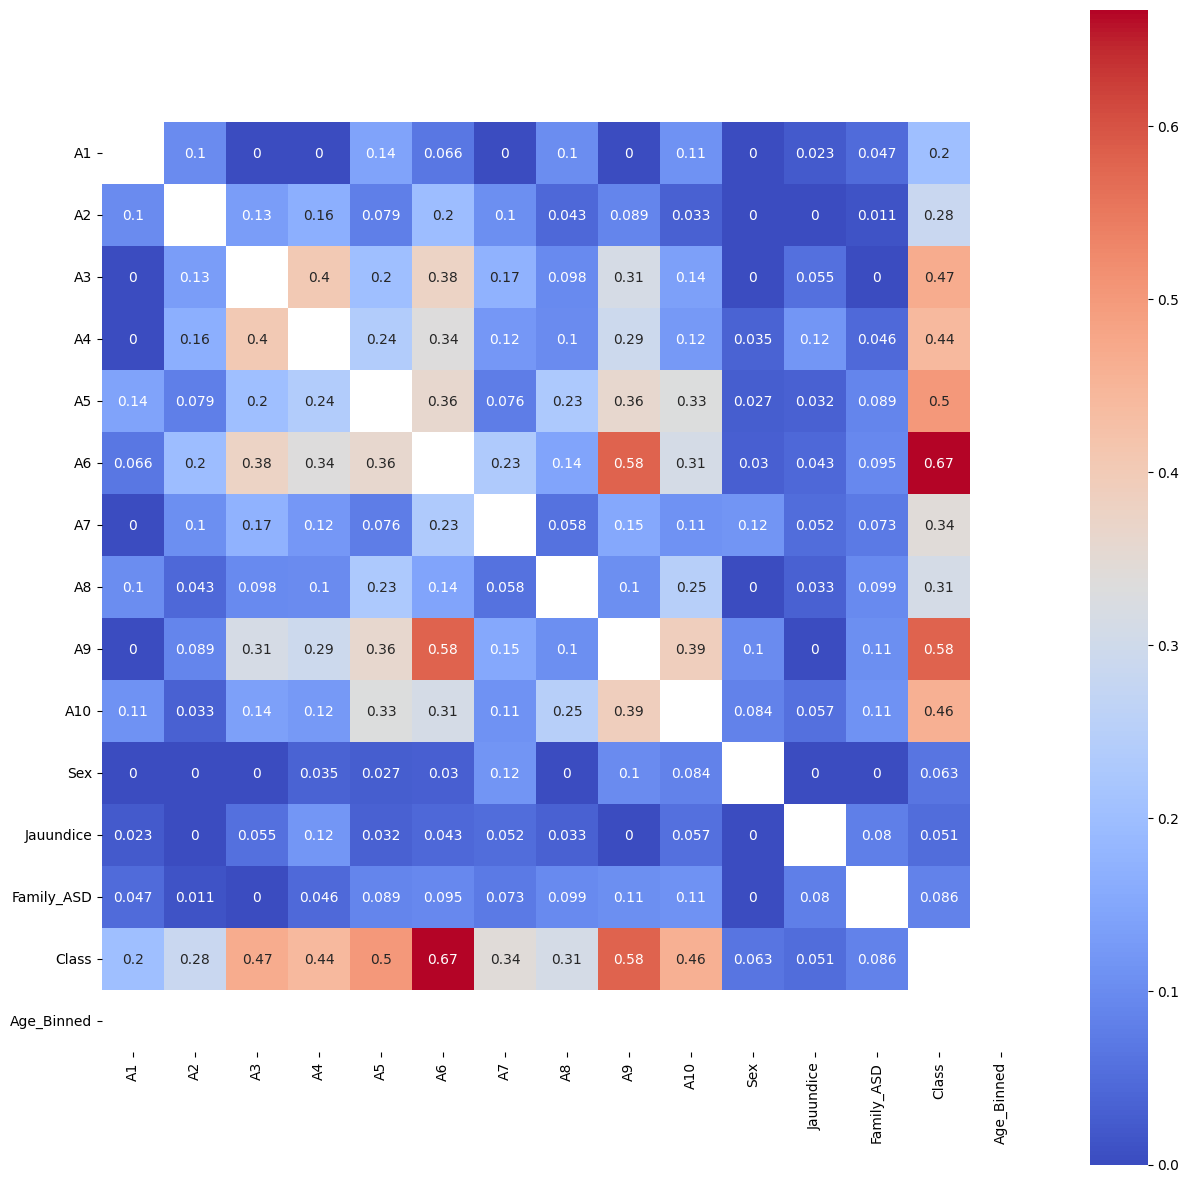

In [40]:
from scipy.stats import chi2_contingency
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
corr_matrix = pd.get_dummies(rel_adol).corr()
cramers_v_matrix = pd.DataFrame(index = rel_adol.columns, columns = rel_adol.columns)
for col1 in rel_adol.columns:
    for col2 in rel_adol.columns:
        if col1 != col2:
            contingency_table = pd.crosstab(rel_adol[col1], rel_adol[col2])
            chi2 = chi2_contingency(contingency_table)[0]
            n = contingency_table.sum().sum()
            r,k = contingency_table.shape
            phi2 = chi2/n
            phi2corr = max(0, phi2-(k-1)*(r-1)/(n-1))
            rcorr = r - ((r-1)**2)/(n-1)
            kcorr = k - ((k-1)**2)/(n-1)
            cramers_v = np.sqrt(phi2corr/ min((kcorr-1), (rcorr-1)))

            cramers_v_matrix.loc[col1, col2] = cramers_v
cramers_v_matrix = cramers_v_matrix.apply(pd.to_numeric, errors ='coerce')
plt.figure(figsize=(15, 15))
sns.heatmap(cramers_v_matrix, annot = True, cmap='coolwarm', square = True)

OBSERVATION:
1. As noted with the child samples sex, jaundice, family_asd does not determine whether a person is autistic or not, while the questions AQ 1-10 has high correlations.
2. Question A6 (Asks if the person is good at social chit chat) has the highest correlation with class
3. Question A9(Asks if the person finds social situations easy) and A5 (Asks if the person frequently finds that he or she doesn't know how to keep a conversation going) also has a high correlation with class
4. There is also a high correlation between A9 and A6.

### RELATIONSHIP ANALYSIS FOR ADULT SAMPLES

In [41]:
rel_adult = categorical[categorical['Age_Binned'] == 'Adult']

<Axes: >

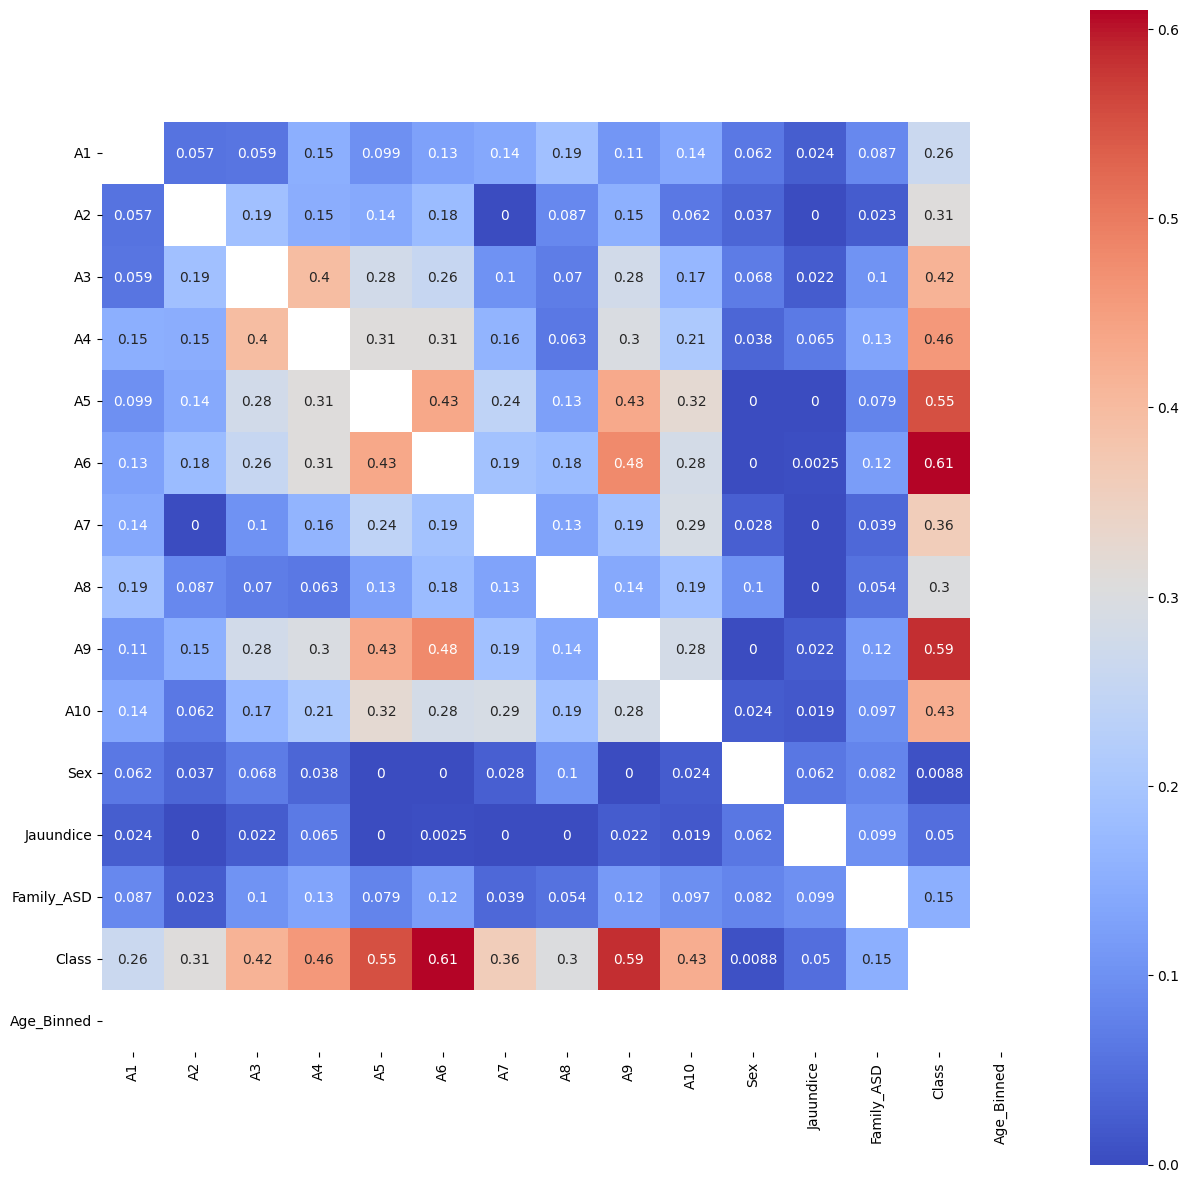

In [42]:
from scipy.stats import chi2_contingency
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
corr_matrix = pd.get_dummies(rel_adult).corr()
cramers_v_matrix = pd.DataFrame(index = rel_adult.columns, columns = rel_adult.columns)
for col1 in rel_adult.columns:
    for col2 in rel_adult.columns:
        if col1 != col2:
            contingency_table = pd.crosstab(rel_adult[col1], rel_adult[col2])
            chi2 = chi2_contingency(contingency_table)[0]
            n = contingency_table.sum().sum()
            r,k = contingency_table.shape
            phi2 = chi2/n
            phi2corr = max(0, phi2-(k-1)*(r-1)/(n-1))
            rcorr = r - ((r-1)**2)/(n-1)
            kcorr = k - ((k-1)**2)/(n-1)
            cramers_v = np.sqrt(phi2corr/ min((kcorr-1), (rcorr-1)))

            cramers_v_matrix.loc[col1, col2] = cramers_v
cramers_v_matrix = cramers_v_matrix.apply(pd.to_numeric, errors ='coerce')
plt.figure(figsize=(15, 15))
sns.heatmap(cramers_v_matrix, annot = True, cmap='coolwarm', square = True)

OBSERVATION:
1. The pattern of low correlation between class and features like sex, jaundice and family asd continues.

2. The feature with the highest correlation with class is A6 (which asks if the person knows how to tell if the person listening to them is getting bored)

3. A5 (which asks if a person finds it easy to read in between the line when someone is talking with them) and A9 (which asks if the person finds it difficult to work out what someone is thinking or feeling just by looking at their face) also has an above average correlation.


## EXPLORING RELATIONSHIP OF VARIABLES WITH HIGH CORRELATION CLASS

ANALYSIS OF CHILDREN DATA

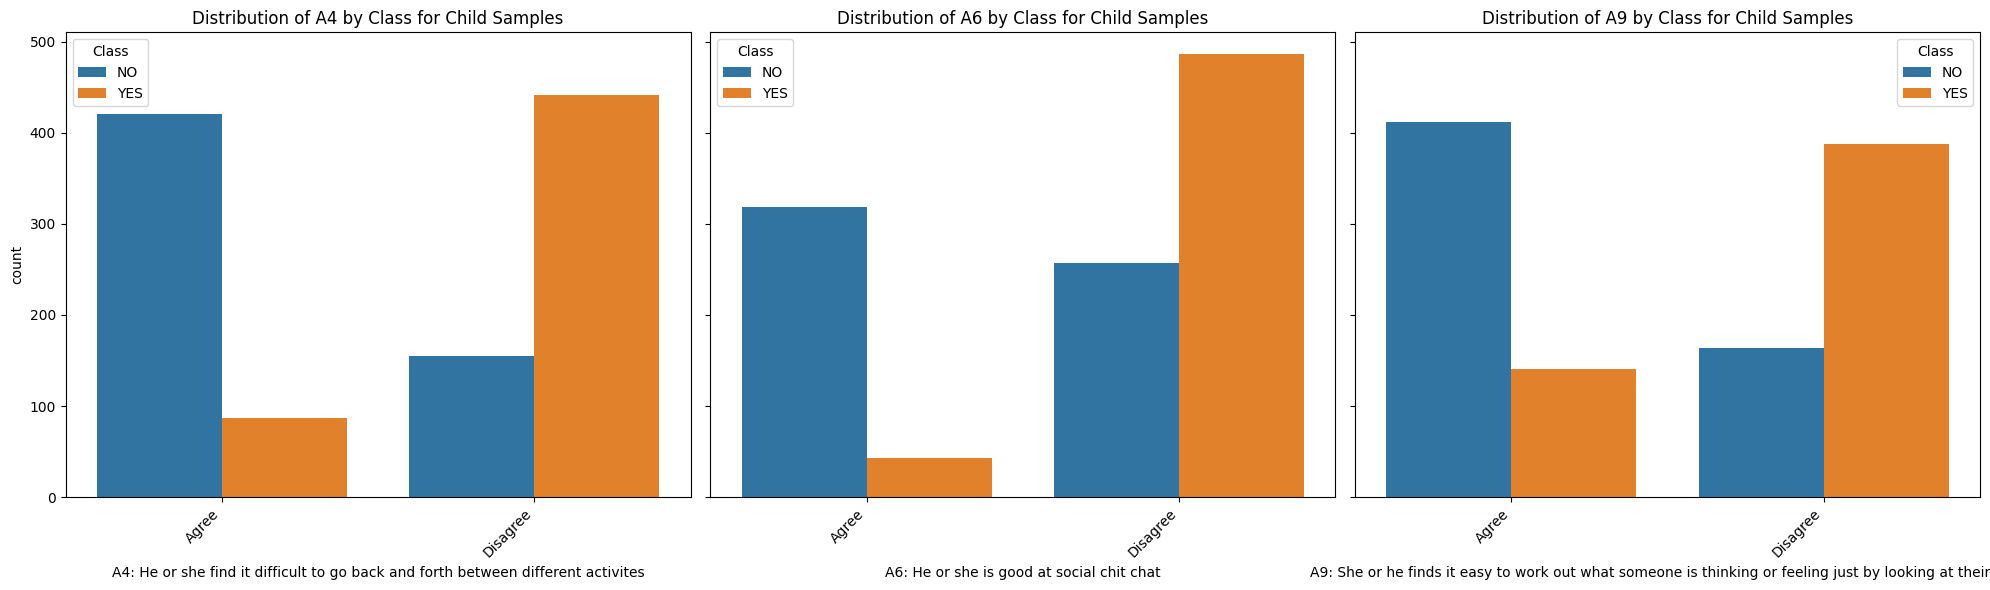

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

sns.countplot(x='A4', hue='Class', data=rel_child, ax=axes[0])
axes[0].set_title('Distribution of A4 by Class for Child Samples')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Agree', 'Disagree'], rotation=45, ha='right')
axes[0].set_xlabel("A4: He or she find it difficult to go back and forth between different activites")

sns.countplot(x='A6', hue='Class', data=rel_child, ax=axes[1])
axes[1].set_title('Distribution of A6 by Class for Child Samples')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Agree', 'Disagree'], rotation=45, ha='right')
axes[1].set_xlabel("A6: He or she is good at social chit chat")

sns.countplot(x='A9', hue='Class', data=rel_child, ax=axes[2])
axes[2].set_title('Distribution of A9 by Class for Child Samples')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Agree', 'Disagree'], rotation=45, ha='right')
axes[2].set_xlabel("A9: She or he finds it easy to work out what someone is thinking or feeling just by looking at their face")

plt.tight_layout()
plt.show()

OBSERVATION:
1. From the first plot we visualized in more detail the relationship between A4 and class. We see that most children who find it difficult to go back and forth between different activities are less likely to be autistic and vice versa.

2. From the second plot we see that children who are not good at social chit chats are more likely to be autistic and vice versa.

3. Children who are able to work out what someone is feeling or thinking just by looking at their face are less likely to be autistic and vice versa


ANALYSIS OF ADOLESCENT DATA

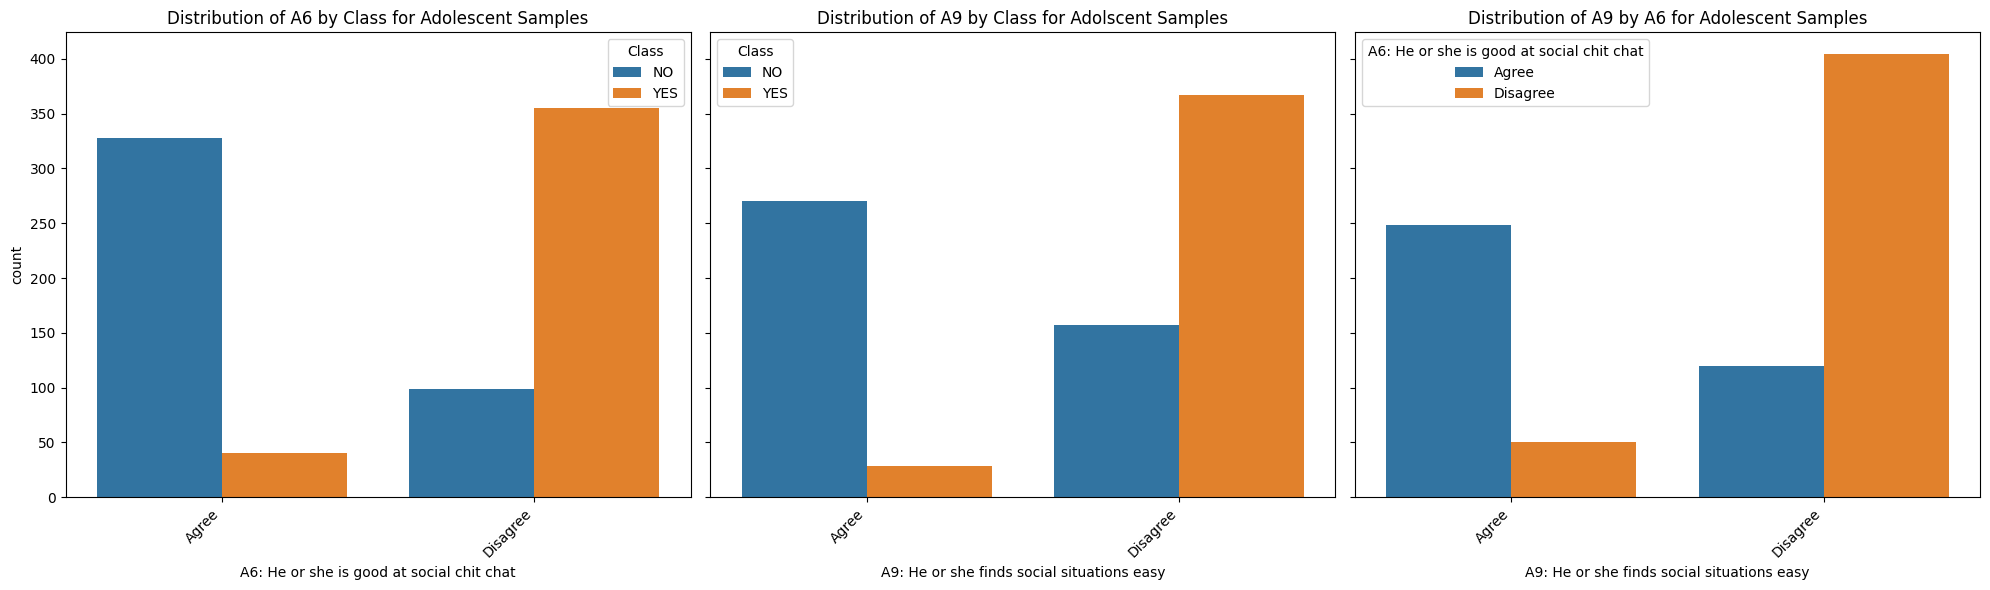

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

sns.countplot(x='A6', hue='Class', data=rel_adol, ax=axes[0])
axes[0].set_title('Distribution of A6 by Class for Adolescent Samples')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Agree', 'Disagree'], rotation=45, ha='right')
axes[0].set_xlabel("A6: He or she is good at social chit chat")

sns.countplot(x='A9', hue='Class', data=rel_adol, ax=axes[1])
axes[1].set_title('Distribution of A9 by Class for Adolscent Samples')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Agree', 'Disagree'], rotation=45, ha='right')
axes[1].set_xlabel("A9: He or she finds social situations easy")

sns.countplot(x='A9', hue='A6', data=rel_adol, ax=axes[2])
axes[2].set_title('Distribution of A9 by A6 for Adolescent Samples')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Agree', 'Disagree'], rotation=45, ha='right')
axes[2].set_xlabel("A9: He or she finds social situations easy")
# Update hue labels for A6 in the legend
handles, labels = axes[2].get_legend_handles_labels()
axes[2].legend(handles=handles, labels=['Agree', 'Disagree'], title='A6: He or she is good at social chit chat')

plt.tight_layout()
plt.show()

OBSERVATION:
1. From the first plot we see that adolscents who are good at social chit chats are less likely to be autistic and vice versa
2. From the second plot we see that adolscents who find social situations easy are less likely to be to be autistic and vice versa
3. In the third plot we explore the relationship between A6 and A9. We find that people who find social situations easy are more likely to be good at social chit chats and vice versa

ANALYSIS OF ADULT DATA

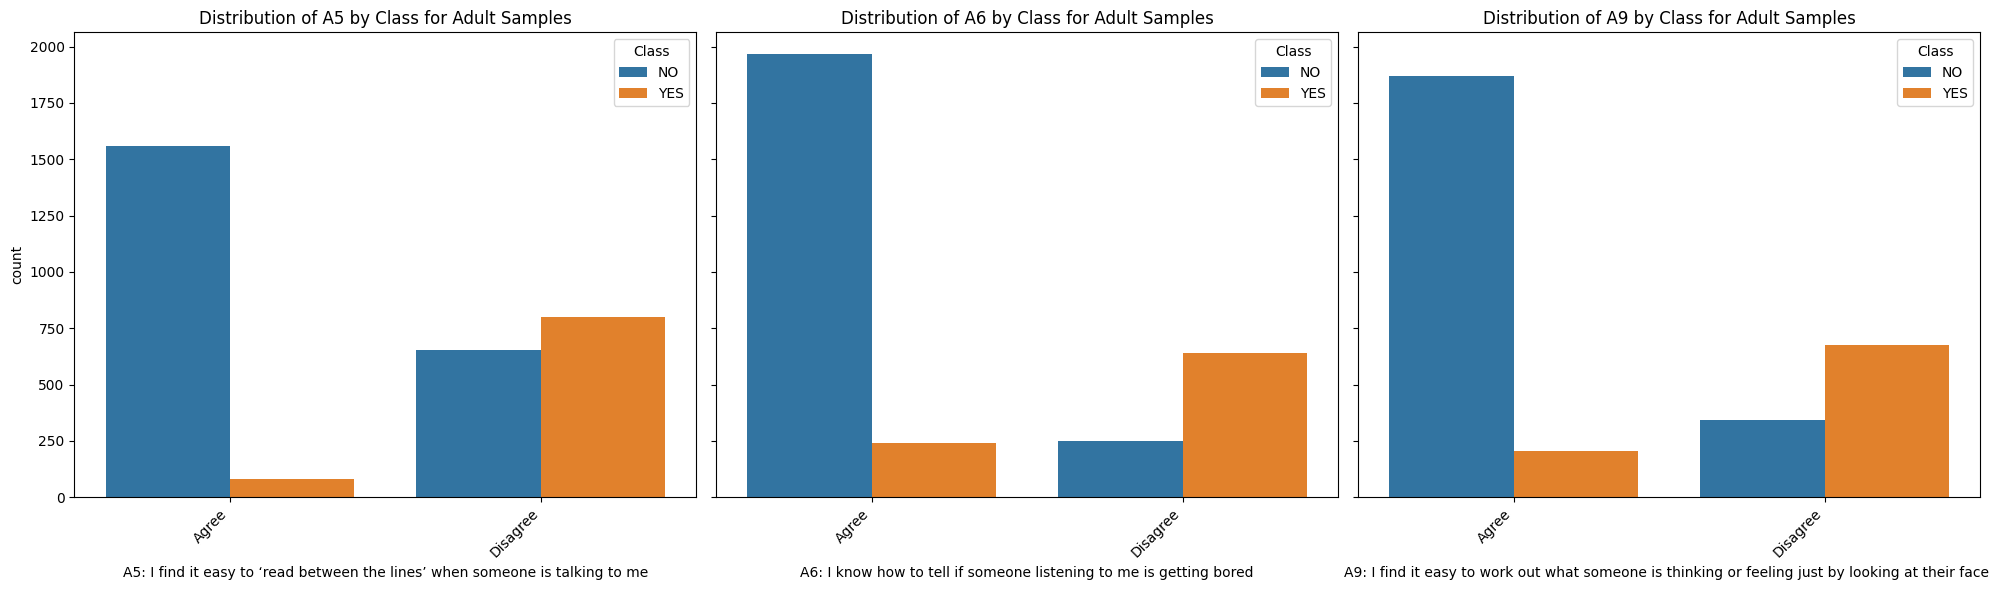

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

sns.countplot(x='A5', hue='Class', data=rel_adult, ax=axes[0])
axes[0].set_title('Distribution of A5 by Class for Adult Samples')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Agree', 'Disagree'], rotation=45, ha='right')
axes[0].set_xlabel("A5: I find it easy to ‘read between the lines’ when someone is talking to me")

sns.countplot(x='A6', hue='Class', data=rel_adult, ax=axes[1])
axes[1].set_title('Distribution of A6 by Class for Adult Samples')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Agree', 'Disagree'], rotation=45, ha='right')
axes[1].set_xlabel("A6: I know how to tell if someone listening to me is getting bored")

sns.countplot(x='A9', hue='Class', data=rel_adult, ax=axes[2])
axes[2].set_title('Distribution of A9 by Class for Adult Samples')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Agree', 'Disagree'], rotation=45, ha='right')
axes[2].set_xlabel("A9: I find it easy to work out what someone is thinking or feeling just by looking at their face ")

plt.tight_layout()
plt.show()

OBSERVATION:
1. You find that adults who find it easy to read in between the lines when someone is talking to them are less likely to be autistic and vice versa

2. In the second plot, you find that adults who know when someone who is listening to them is getting bored are less likely to be autistic and vice versa

3. In the third plot, you find that adutls who find it easy to work out what someone is thinking or feeling just by looking at their face is less likely to be autistic and vice versa.

4. See how the number of Yes class (Orange bars) are fewer than the No class (Blue bars) this is the effect of the class imbalance noted before in the distribution analysis for the adult class.

## CONCLUSION (ANSWERING MY QUESTIONS BASED ON THE PLOT:


1. WHAT FACTORS RELIABLY INDICATE AUTISM:
The main factors according to my analysis are FOR CHILDREN: finding social chitchats difficult, finding it difficult to go back and forth between different activities, finding it difficult to deduce someones thought or feeling by looking at their face  FOR ADOLSCENTS: Finding social chit chat and situations difficult   FOR ADULTS: Finding it hard to read in between the line when someone is talking to them, not being able to deduce when someone listening to you is bored, and finding it difficult to deduce what someone is thinking or feeling by looking at their face.



2. ARE FEATURES LIKE JAUNDICE, SEX, FAMILY HISTORY OF ASD STRONG INDICATORS OF AUTISM: The answer I found to this question after analysis is no



3. ARE THEIR ANY OTHER SPECIAL PATTERNS IN THE DATA:
The other special patterns i noticed is that most of the questions are correlated with each other to some extent, for example the question as to whether someone is good at social chit or not is correlated to whether a person finds social situations easy. A person who finds social situations easy is likely to be good at social chit chat and vice versa.

# MODEL TRAINING AND EVALUATION

Use average prediction over multiple models to give probability of confidence

## PREPROCESSING THE DATA BEFORE FITTING MODEL TRAINING

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [ ]:
bins = [4, 12, 19, data['Age'].max() + 1]
labels = ['Child', 'Adolescent', 'Adult']
data['Age_Binned'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

In [ ]:
categorical = data.drop('Age', axis = 1)
numerical = data['Age']

In [ ]:
X = categorical.drop('Class', axis=1)
y = categorical['Class']

In [ ]:
print(categorical.columns.tolist())

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Sex', 'Jauundice', 'Family_ASD', 'Class', 'Age_Binned']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

In [ ]:
columns = X_train.columns.to_list()
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
encoder.fit(X_train[columns])

X_train = encoder.transform(X_train[columns])
X_test = encoder.transform(X_test[columns])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report

## ML MODELS

### DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelDTC = DecisionTreeClassifier(max_depth=5, random_state=42)
modelDTC.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_predDTC = modelDTC.predict(X_test)
print("Classification Report for Decision Tree Classifier:")
print(classification_report(y_test, y_predDTC, labels=['NO', 'YES']))

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

          NO       0.89      0.94      0.91       644
         YES       0.88      0.79      0.83       361

    accuracy                           0.88      1005
   macro avg       0.88      0.86      0.87      1005
weighted avg       0.88      0.88      0.88      1005



### RANDOM TREE CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelRFC = RandomForestClassifier(n_estimators=200, random_state=42)
modelRFC.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
y_predRTC = modelRFC.predict(X_test)
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_predRTC, labels=['NO', 'YES']))

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

          NO       0.98      0.99      0.98       644
         YES       0.98      0.96      0.97       361

    accuracy                           0.98      1005
   macro avg       0.98      0.98      0.98      1005
weighted avg       0.98      0.98      0.98      1005



### CATBOOST CLASSIFIER

In [ ]:
#!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.9 MB/s eta 0:00:00


In [ ]:
# This is processed differently because the catboost classifier does not require dummy variables
XCBC = categorical.drop('Class', axis=1)
yCBC = categorical['Class']
X_trainCBC, X_testCBC, y_trainCBC, y_testCBC = train_test_split(XCBC, yCBC, test_size=0.2, random_state=42, stratify = y)

In [ ]:
from catboost import CatBoostClassifier

modelCBC = CatBoostClassifier(iterations=300, depth=6, learning_rate=0.1, verbose=False)

modelCBC.fit(X_trainCBC, y_trainCBC, cat_features=['Sex', 'Jauundice', 'Family_ASD', 'Age_Binned'])

In [ ]:
y_predCBC = modelCBC.predict(X_testCBC)
print("Classification Report for CatBoost Classifier:")
print(classification_report(y_testCBC, y_predCBC, labels=['NO', 'YES']))

Classification Report for CatBoost Classifier:
              precision    recall  f1-score   support

          NO       1.00      1.00      1.00       644
         YES       1.00      1.00      1.00       361

    accuracy                           1.00      1005
   macro avg       1.00      1.00      1.00      1005
weighted avg       1.00      1.00      1.00      1005



### LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(max_iter=1000)
modelLR.fit(X_train, y_train)

y_predLR = modelLR.predict(X_test)

In [ ]:
y_predLR = modelLR.predict(X_test)
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_predLR, labels=['NO', 'YES']))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

          NO       1.00      1.00      1.00       644
         YES       1.00      1.00      1.00       361

    accuracy                           1.00      1005
   macro avg       1.00      1.00      1.00      1005
weighted avg       1.00      1.00      1.00      1005



## ARTIFICIAL NEURAL NETWORK

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
y = y.map({'NO': 0, 'YES': 1})

In [ ]:
y.head()

,Class
0,0
1,0
2,1
3,1
4,1


In [ ]:
X_trainANN, X_testANN, y_trainANN, y_testANN = train_test_split(X, y, test_size=0.2, random_state=49)

X_trainANN = encoder.transform(X_trainANN[columns])
X_testANN = encoder.transform(X_testANN[columns])

In [ ]:
modelANN = Sequential()

modelANN.add(Dense(32, activation='relu', input_shape=(X_trainANN.shape[1],)))
modelANN.add(Dense(16, activation='relu'))
modelANN.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
modelANN.compile( optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = modelANN.fit(X_trainANN.astype(int), y_trainANN, epochs=50, batch_size=32, validation_split=0.2,verbose=1)

Epoch 1/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5522 - loss: 0.6778 - val_accuracy: 0.8197 - val_loss: 0.4730
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8741 - loss: 0.3912 - val_accuracy: 0.9030 - val_loss: 0.2560
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9243 - loss: 0.2206 - val_accuracy: 0.9403 - val_loss: 0.1754
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9588 - loss: 0.1499 - val_accuracy: 0.9366 - val_loss: 0.1403
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9599 - loss: 0.1201 - val_accuracy: 0.9701 - val_loss: 0.1086
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9767 - loss: 0.0940 - val_accuracy: 0.9739 - val_loss: 0.0895
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9799 - loss: 0.0793 - val_accuracy: 0.9801 - val_loss: 0.0754
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9896 - loss: 0.0627 - val_accuracy: 0.

In [ ]:
y_probANN = modelANN.predict(X_testANN.astype(int))
y_predANN = (y_probANN > 0.5).astype(int)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
print("Classification Report for Artificial Neural Network:")
print(classification_report(y_testANN, y_predANN, labels=[0, 1]))

Classification Report for Artificial Neural Network:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       644
           1       1.00      1.00      1.00       361

    accuracy                           1.00      1005
   macro avg       1.00      1.00      1.00      1005
weighted avg       1.00      1.00      1.00      1005



# DEPLOYMENT

All the model performed well especially logistic regression, the catboost classifier and the Artificial Neural Network. I will go on to host my model with the Artificial Neural Network



## SAVING THE MODEL AND ENCODER

In [ ]:
import pickle
bundle = {
    "ASDmodel": modelANN,
    "encoder": encoder,
    "columns": columns
}

with open("ASDmodel.pkl", "wb") as f:
    pickle.dump(bundle, f)

## THE STREAMLIT DEPLOYMENT CODE

In [ ]:
import streamlit as st
import pickle
import pandas as pd

def ChildPreprocessing15710(val):
  match val:
    case "Definitely Agree":
      return 1
    case "Slightly Agree":
      return 1
    case _:
      return 0


def ChildPreprocessing234689(val):
  match val:
    case "Definitely Disagree":
      return 1
    case "Slightly Disagree":
      return 1
    case _:
      return 0


def AdolescentPreprocessing15810(val):
  match val:
    case "Definitely Agree":
      return 1
    case "Slightly Agree":
      return 1
    case _:
      return 0


def AdolescentPreprocessing234679(val):
  match val:
    case "Definitely Disagree":
      return 1
    case "Slightly Disagree":
      return 1
    case _:
      return 0


def AdultPreprocessing17810(val):
  match val:
    case "Definitely Agree":
      return 1
    case "Slightly Agree":
      return 1
    case _:
      return 0


def AdultPreprocessing234569(val):
  match val:
    case "Definitely Disagree":
      return 1
    case "Slightly Disagree":
      return 1
    case _:
      return 0


def prediction(A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, Age_Binned, Sex, Jaundice, Family_ASD):
  data = {
      "A1" : A1,
      "A2" : A2,
      "A3" : A3,
      "A4" : A4,
      "A5" : A5,
      "A6" : A6,
      "A7" : A7,
      "A8" : A8,
      "A9" : A9,
      "A10" : A10,
      "Age_Binned" : Age_Binned,
      "Sex" : Sex,
      "Jauundice" : Jaundice,
      "Family_ASD" : Family_ASD
  }

  predictdata = pd.DataFrame([data])

  predictdata["Sex"] = predictdata["Sex"].apply(lambda x: 'm' if x == "Male" else 'f')
  predictdata["Jauundice"] = predictdata["Jauundice"].str.lower()
  predictdata["Family_ASD"] = predictdata["Family_ASD"].str.lower()

  preprocesseddata = preprocess(predictdata)
  y_prob = bundle["ASDmodel"].predict(preprocesseddata)
  Class = (y_prob >= 0.5).astype(int)

  if Class[0] == 0:
    st.write("The person is not at risk of having (Autism Spectrum Disorder) ASD")
  else:
    st.write("The person is at risk of having (Autism Spectrum Disorder) ASD")


with open("ASDmodel.pkl", "rb") as f:
  bundle = pickle.load(f)


def apply_question_preprocessing(row, question_col):
    age_binned = row['Age_Binned']
    val = row[question_col]

    if age_binned == 'Child':
        if question_col in ['A1', 'A5', 'A7', 'A10']:
            return ChildPreprocessing15710(val)
        elif question_col in ['A2', 'A3', 'A4', 'A6', 'A8', 'A9']:
            return ChildPreprocessing234689(val)
    elif age_binned == 'Adolescent':
        if question_col in ['A1', 'A5', 'A8', 'A10']:
            return AdolescentPreprocessing15810(val)
        elif question_col in ['A2', 'A3', 'A4', 'A6', 'A7', 'A9']:
            return AdolescentPreprocessing234679(val)
    elif age_binned == 'Adult':
        if question_col in ['A1', 'A7', 'A8', 'A10']:
            return AdultPreprocessing17810(val)
        elif question_col in ['A2', 'A3', 'A4', 'A5', 'A6', 'A9']:
            return AdultPreprocessing234569(val)
    return val

def preprocess(data):
  for col in [f'A{i}' for i in range(1, 11)]:
    data[col] = data.apply(lambda row: apply_question_preprocessing(row, col), axis=1)
  data = bundle["encoder"].transform(data[bundle["columns"]])
  return data


st.title("AUTISM RISK SCREENING")
st.write("Choose a suitable answer from the options for the questions asked to predict whether a person is at the risk of having Autism Spectrum Disorder (ASD)")
st.write("It is suitable for people of age 4 upward with suspected autism who do not have a learning disability")

Sex = st.selectbox('If you are a parent/guardian answering for a child or adolescent, please select the child’s gender. If you are an adult participant, select your own gender', ['Male', 'Female'])
Jaundice = st.selectbox('Have you/the Child ever had Jauundice before?', ['Yes', 'No'])
Family_ASD = st.selectbox('Is there a family history of Autism Spectrum Disorder?', ['Yes', 'No'])
Age_Binned = st.selectbox('What age group are you in? Note: 4-11(Child), 12-17(Adolescent), 18+(Adult)', ['Child', 'Adolescent', 'Adult'])

#Ask ASD questions for each age group.
options = ['Choose one option below', 'Definitely Disagree', 'Slightly Disagree', 'Slightly Agree', 'Definitely Agree']

A1 = A2 = A3 = A4 = A5 = A6 = A7 = A8 = A9 = A10 = None

if Age_Binned == 'Child':
  A1 = st.selectbox('She/he often notices small sounds when others do not ', options)
  A2 = st.selectbox('She/he usually concentrates more on the whole picture, rather than the small details', options)
  A3 = st.selectbox('In a social group, she/he can easily keep track of several different people’s conversations', options)
  A4 = st.selectbox('She/he finds it easy to go back and forth between different activities', options)
  A5 = st.selectbox('She/he doesn’t know how to keep a conversation going with his/her peers ', options)
  A6 = st.selectbox('She/he is good at social chit-chat', options)
  A7 = st.selectbox('When she/he is read a story, she/he finds it difficult to work out the character’s intentions or feelings', options)
  A8 = st.selectbox('When she/he was in preschool, she/he used to enjoy playing games involving pretending with other children', options)
  A9 = st.selectbox('She/he finds it easy to work out what someone is thinking or feeling just by looking at their face', options)
  A10 = st.selectbox('She/he finds it hard to make new friends', options)

elif Age_Binned == 'Adolescent':
  A1 = st.selectbox('She/he notices patterns in things all the time', options)
  A2 = st.selectbox('She/he usually concentrates more on the whole picture, rather than the small details', options)
  A3 = st.selectbox('In a social group, she/he can easily keep track of several different people’s conversations', options)
  A4 = st.selectbox('If there is an interruption, she/he can switch back to what she/he was doing very quickly', options)
  A5 = st.selectbox('She/he frequently finds that she/he doesn’t know how to keep a conversation going', options)
  A6 = st.selectbox('She/he is good at social chit-chat', options)
  A7 = st.selectbox('When she/he was younger, she/he used to enjoy playing games involving pretending with other children', options)
  A8 = st.selectbox('She/he finds it difficult to imagine what it would be like to be someone else', options)
  A9 = st.selectbox('She/he finds social situations easy', options)
  A10 = st.selectbox('She/he finds it hard to make new friends', options)

elif Age_Binned == 'Adult':
  A1 = st.selectbox('I often notice small sounds when others do not', options)
  A2 = st.selectbox('I usually concentrate more on the whole picture, rather than the small details', options)
  A3 = st.selectbox('I find it easy to do more than one thing at once', options)
  A4 = st.selectbox('If there is an interruption, I can switch back to what I was doing very quickly', options)
  A5 = st.selectbox('I find it easy to ‘read between the lines’ when someone is talking to me', options)
  A6 = st.selectbox('I know how to tell if someone listening to me is getting bored', options)
  A7 = st.selectbox('When I’m reading a story I find it difficult to work out the characters’ intentions', options)
  A8 = st.selectbox('I like to collect information about categories of things (e.g. types of car, types of bird, types of train, types of plant etc) ', options)
  A9 = st.selectbox('I find it easy to work out what someone is thinking or feeling just by looking at their face', options)
  A10 = st.selectbox('I find it difficult to work out people’s intentions', options)


if st.button('SCREEN AUTISM RISK'):
    if all(v is not None for v in [A1, A2, A3, A4, A5, A6, A7, A8, A9, A10]):
        prediction(A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, Age_Binned, Sex, Jaundice, Family_ASD)
    else:
        st.error("Please answer all questions before screening")